# Mercedes- Benz Project

In [ ]:
### The objective of the project is to develop a ML algorithm that can accurately predict the time a car 
#will spend on the test bench based on the vehicle configuration

In [1]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

### Loading Train and test data

In [3]:
# Loading data
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

### Descriptive Analytics

In [4]:
df_train.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
df_train.shape,df_test.shape

((4209, 378), (4209, 377))

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [9]:
#df_train.dtypes
# The columns x0 to x8 are categorical (object type)
# x10 to x385 are numerical(binary)
# y is the time spent on test table  ( The value to be predicted)
# Total 378 cols

In [10]:
#df_test.dtypes
# The columns x0 to x8 are categorical (object type)
# x10 to x385 are numerical(binary)
# Total 377 cols

In [11]:
df_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [12]:
df_test.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [13]:
df_train.columns[10:]

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

In [14]:
np.unique(df_train[df_train.columns[10:]])

array([0, 1], dtype=int64)

### Null values

In [15]:
df_train.isnull().sum().sum()

0

In [16]:
df_test.isnull().sum().sum()

0

In [17]:
# No missing values in train and test datasets

### Distribution of y- Histogram, Normality test, outliers

In [18]:
df_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [19]:
from scipy.stats import zscore

In [20]:
y_upper_outlier= df_train[(zscore(df_train['y'])>3)].reset_index()
print("count of upper ouliers of y is ",len(y_upper_outlier))

count of upper ouliers of y is  40


In [21]:
y_lower_outlier=df_train[(zscore(df_train['y'])<-3)].reset_index()
print("count of lower ouliers of y is ",len(y_lower_outlier))

count of lower ouliers of y is  0


Text(0.5, 0, 'testing time in secs')

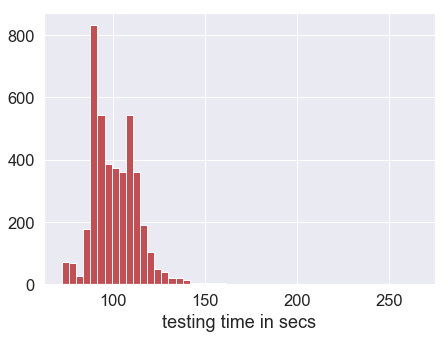

In [22]:
plt.figure(figsize=(7,5))
plt.hist(df_train['y'],bins=50,color='r')
plt.xlabel('testing time in secs')

Text(0, 0.5, 'y')

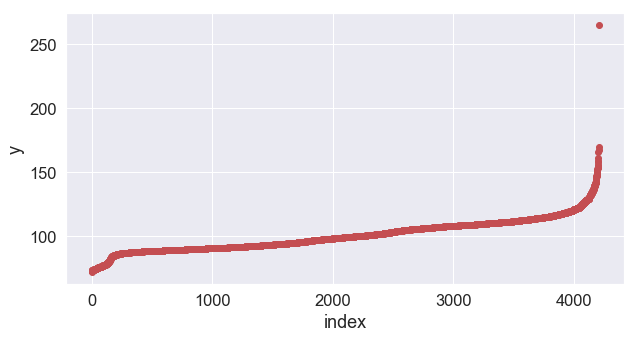

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(range(df_train.shape[0]),np.sort(df_train['y']),c='r')
plt.xlabel('index')
plt.ylabel('y')

Text(0.5, 0, 'Testing time')

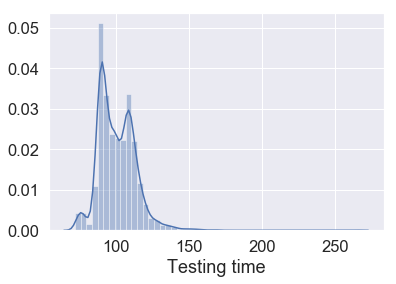

In [24]:
sns.distplot(df_train['y'],bins=50)
plt.xlabel('Testing time')

In [25]:
from scipy.stats import shapiro
stat,p= shapiro(df_train['y'])
print("Shapiro stat value is {} and p value is {}".format(stat,p))

alpha=0.05
if p > 0.05:
 print('Sample looks Gaussian')
else:
 print('Sample does not look Gaussian')

Shapiro stat value is 0.93858402967453 and p value is 1.2467101604672783e-38
Sample does not look Gaussian


### Types of columns

In [26]:
dtypes_df=df_train.dtypes.reset_index()
dtypes_df.columns=['Count','columntype']
dtypes_df
dtypes_df.groupby('columntype').agg('count').reset_index()

,columntype,Count
0,int64,369
1,float64,1
2,object,8


In [27]:
dtypes_df=df_test.dtypes.reset_index()
dtypes_df.columns=['Count','columntype']
dtypes_df
dtypes_df.groupby('columntype').agg('count').reset_index()

,columntype,Count
0,int64,369
1,object,8


In [28]:
df_train_num=df_train.select_dtypes(exclude=['object'])
df_train_num.shape,df_train_num.columns # Numerical columns

((4209, 370),
 Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
        ...
        'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
        'X385'],
       dtype='object', length=370))

In [29]:
df_train_obj=df_train.select_dtypes(include=['object'])
df_train_obj.shape,df_train_obj.columns # Categorical columns

((4209, 8),
 Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object'))

In [30]:
df_test_num=df_test.select_dtypes(exclude=['object'])
df_test_num.shape,df_test_num.columns # Numerical columns

((4209, 369),
 Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
        ...
        'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
        'X385'],
       dtype='object', length=369))

In [31]:
df_test_obj=df_test.select_dtypes(include=['object'])
df_test_obj.shape,df_test_obj.columns # Categorical columns

((4209, 8),
 Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object'))

In [32]:
# Checking the unique values in the categorical variable

In [33]:
train_cat_uniq=[]
for col in df_train_obj.columns:
    print('The no of unique values in '+col+' is ',df_train_obj[col].nunique())
    train_cat_uniq.append(df_train_obj[col].nunique())
    print('The unique values are', df_train_obj[col].unique())
    print('---------------------------------------------------------------------------------')

The no of unique values in X0 is  47
The unique values are ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
---------------------------------------------------------------------------------
The no of unique values in X1 is  27
The unique values are ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
---------------------------------------------------------------------------------
The no of unique values in X2 is  44
The unique values are ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
---------------------------------------------------------------------------------
The no of unique values in X3 is  7
The unique va

In [34]:
test_cat_uniq=[]
for col in df_test_obj.columns:
    print('The no of unique values in '+col+' is ',df_test_obj[col].nunique())
    test_cat_uniq.append(df_test_obj[col].nunique())
    print('The unique values are', df_test_obj[col].unique())
    print('---------------------------------------------------------------------------------')

The no of unique values in X0 is  49
The unique values are ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
---------------------------------------------------------------------------------
The no of unique values in X1 is  27
The unique values are ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
---------------------------------------------------------------------------------
The no of unique values in X2 is  45
The unique values are ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
---------------------------------------------------------------------------------
The no of unique values in X3 is

In [35]:
test_cat_uniq #'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'

[49, 27, 45, 7, 4, 32, 12, 25]

In [36]:
train_cat_uniq #'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'

[47, 27, 44, 7, 4, 29, 12, 25]

In [37]:
#Different set of categories in X0,X2 and X5 columns, when train and test data is compared

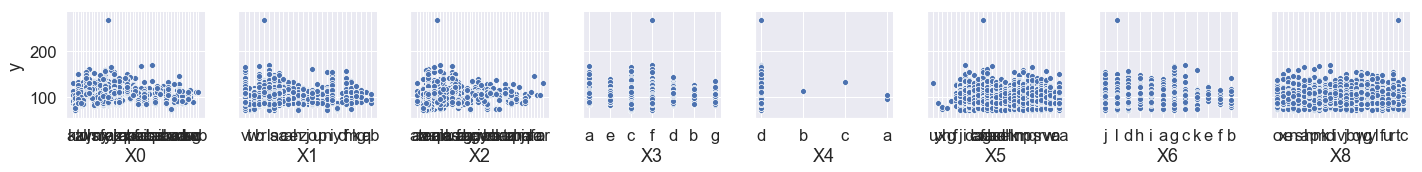

In [38]:
sns.pairplot(df_train,x_vars=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'],y_vars=['y'])

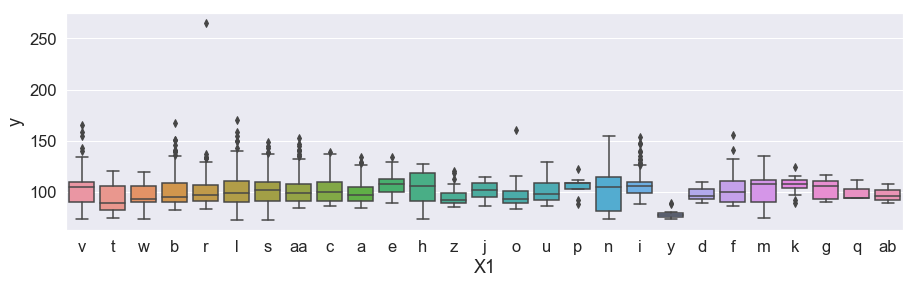

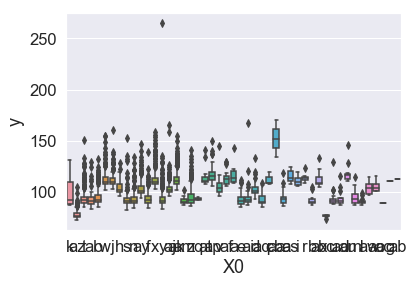

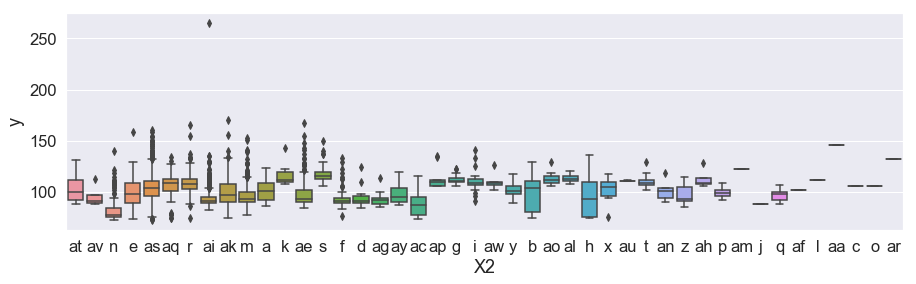

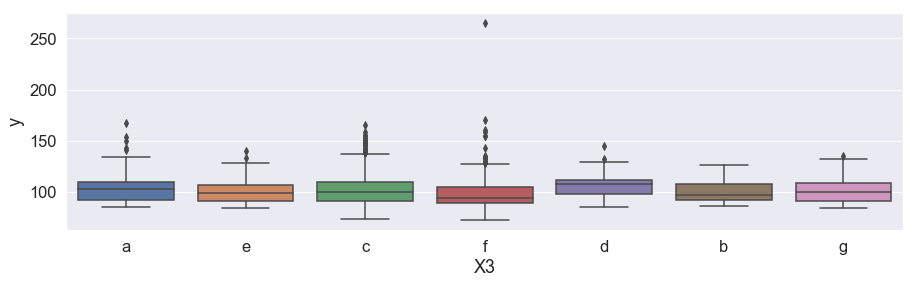

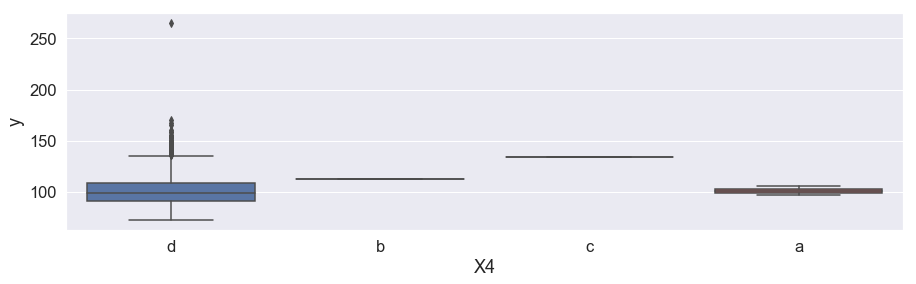

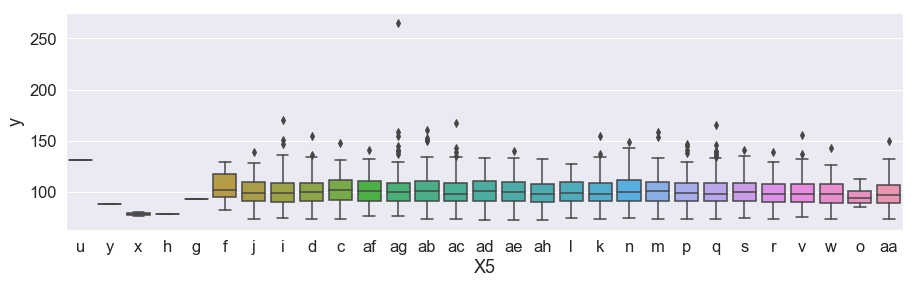

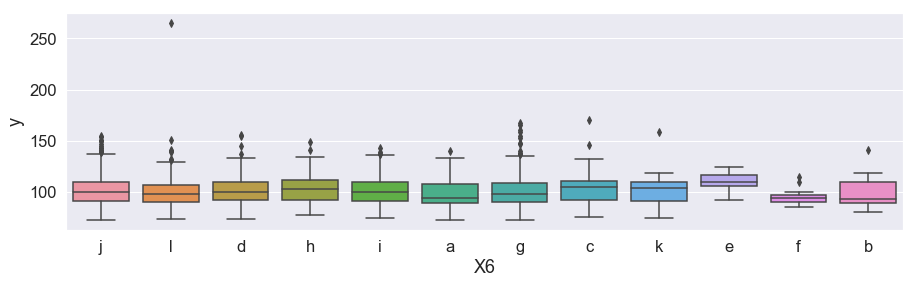

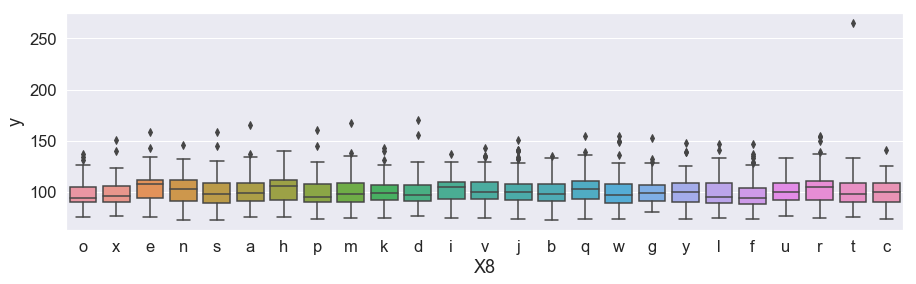

<Figure size 1080x288 with 0 Axes>

In [39]:
#plt.figure(figsize=(10,4))
for i,col in enumerate(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']):
 plt.figure(figsize=(15,4))
 plt.figure(i)
 sns.boxplot(x=col,y='y', data=df_train)
 plt.xlabel(col)
 plt.savefig("Boxplots of categorical columns-train.png")

### EDA using pandas_profiling

In [40]:
from pandas_profiling import ProfileReport

In [41]:
#rpt=ProfileReport(df_train)
#rpt.to_file("EDA of train dataset.html")

In [42]:
#rpt1=ProfileReport(df_test)
#rpt1.to_file("EDA of test dataset.html")

### Checking for Duplicates 

In [43]:
print("The count of duplicates in train set :-",len(df_train[df_train.duplicated()]))

The count of duplicates in train set :- 0


In [44]:
x=df_train.drop(['y'],axis=1)
y=df_train['y']

x.reset_index(inplace=True,drop=True)
y.reset_index(inplace=True,drop=True)
x.shape, y.shape

((4209, 377), (4209,))

In [45]:
x.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0


### Label Encoding

Dummifiying the categorical variables . Also needs to address the difference in the unique categories available in some categorical columns in train and test dataset. This can be done by merging train and test into a single dataset,and encoding them. The encoded dataset can be then split into train and test sets

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
df=df_train.append(df_test,ignore_index=True)
df.shape, df.index

((8418, 378), RangeIndex(start=0, stop=8418, step=1))

In [48]:
df.select_dtypes(include='object').columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [49]:
cat_cols=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
le=LabelEncoder()
for col in cat_cols:
 df[col]=le.fit_transform(df[col])

In [50]:
for col in cat_cols:
 print(col,':',df[col].nunique())

X0 : 53
X1 : 27
X2 : 50
X3 : 7
X4 : 4
X5 : 33
X6 : 12
X8 : 25


In [51]:
train,test= df[0:len(df_train)],df[len(df_train):]
train.shape,test.shape

((4209, 378), (4209, 378))

In [52]:
# creating x and y variables
x_train_initial=train.drop(['ID','y'],axis=1)
y_train_initial=train['y']

# creating x_test variable
x_test_initial= test.drop(['ID','y'],axis=1)

x_train_initial.shape,y_train_initial.shape,x_test_initial.shape

((4209, 376), (4209,), (4209, 376))

### Checking Variance of columns

In [53]:
from sklearn.feature_selection import VarianceThreshold

In [54]:
var=VarianceThreshold(threshold=0.8)
var.fit(x_train_initial)

VarianceThreshold(threshold=0.8)

In [55]:
sorted(list(zip(x_train_initial,var.variances_)),key=lambda x:x[1], reverse=True)

[('X0', 230.6753130178851),
 ('X2', 135.7617477984617),
 ('X5', 77.65744923946193),
 ('X1', 72.7606831484491),
 ('X8', 49.52010018694737),
 ('X6', 8.506708153076362),
 ('X3', 3.02657572124944),
 ('X127', 0.2499762780781614),
 ('X337', 0.24972734607266864),
 ('X362', 0.2495873570990582),
 ('X191', 0.24915293970353164),
 ('X186', 0.2487044105163104),
 ('X194', 0.2487044105163104),
 ('X334', 0.24859975746910318),
 ('X250', 0.24720551244967656),
 ('X223', 0.2469486778408349),
 ('X178', 0.24670787422735826),
 ('X220', 0.24625720004779947),
 ('X329', 0.24580844507191116),
 ('X314', 0.24533428887097256),
 ('X14', 0.24483473144498366),
 ('X358', 0.24466256758630955),
 ('X324', 0.24438123490708596),
 ('X58', 0.24438123490708596),
 ('X187', 0.24368411239737267),
 ('X261', 0.24353215662440517),
 ('X137', 0.24330083613494735),
 ('X246', 0.24178455234094587),
 ('X85', 0.24156779522051675),
 ('X46', 0.24053436049113777),
 ('X311', 0.24030179816401076),
 ('X251', 0.23879691669769854),
 ('X355', 0.235

X0,X2,X5, X1, X8,X6,X3 are the variables with the highest variances and thus the most predictive power

### Train test split of train data( x and y) , with 25% test size

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train,y_test=train_test_split(x_train_initial,y_train_initial,test_size=0.25,random_state=4)
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((3156, 376), (3156,), (1053, 376), (1053,))

### LinearRegression

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

In [59]:
linereg=LinearRegression()

linereg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
#training prediction
y_pred=linereg.predict(x_train)
print("\nTraining Score for linear regression")
print("-------------------------------------")
print("Mean squared Error",mean_squared_error(y_train,y_pred))
print("r2 score",r2_score(y_train,y_pred))

# testing prediction
y_pred=linereg.predict(x_test)
print("\nTesting Score for linear regression")
print("------------------------------------")
print("Mean squared Error",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))


Training Score for linear regression
-------------------------------------
Mean squared Error 64.99731559685567
r2 score 0.6008208258342362

Testing Score for linear regression
------------------------------------
Mean squared Error 7.799343958165647e+19
r2 score -5.050270899339964e+17


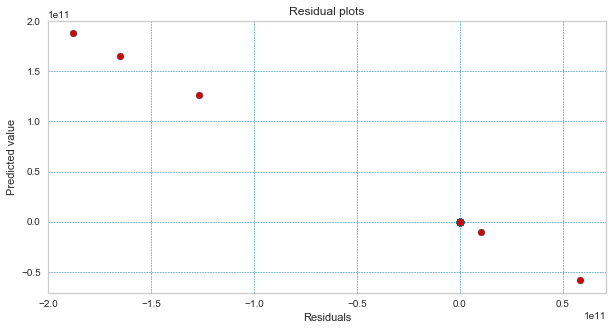

In [94]:
#Residualanalysis
resid=y_test-y_pred
plt.figure(figsize=(10,5))
plt.grid(color='b', linestyle='--', linewidth=0.5,fillstyle='full')
plt.scatter(resid,y_pred,c='r',marker='o',edgecolors='b')
plt.xlabel("Residuals")
plt.ylabel("Predicted value")
plt.title("Residual plots")
plt.savefig("Residual analysis.png")
plt.show()

In [66]:
from yellowbrick.regressor import ResidualsPlot

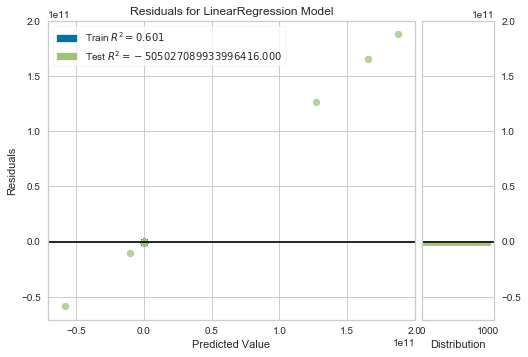

In [68]:
visualizer = ResidualsPlot(linereg)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
visualizer.

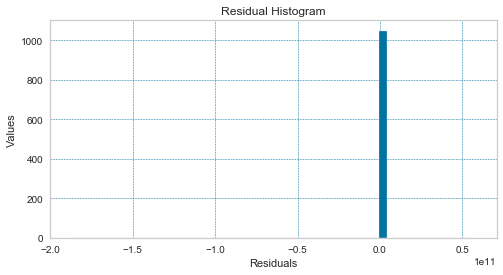

In [108]:
#Normality of residuals
plt.figure(figsize=(8,4))
plt.grid(color='b', linestyle='--', linewidth=0.5,fillstyle='full')
plt.hist(resid,bins=50)
plt.xlabel("Residuals")
plt.ylabel("Values")
plt.title("Residual Histogram")
plt.savefig("Residual analysis histogram.png")
plt.show()

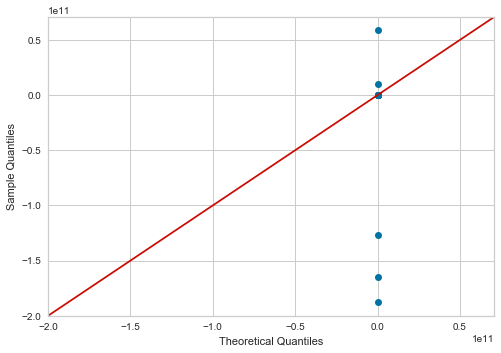

In [128]:
import statsmodels.api as sm
fig=sm.qqplot(resid,line='45')
fig.show()

In [134]:
# Null hypothesis- The data does not have a gaussian distribution
from scipy.stats import shapiro
stat,p=shapiro(resid)
print(stat,p)
alpha=0.05

if p>0.05:
    print("Sample does looks Gaussian")
else:
    print("Sample does not looks Gaussian")

0.034892380237579346 0.0
Sample does not looks Gaussian


A residual plot shows the residuals on the vertical axis and the independent variable on the horizontal axis.

If the points are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; 
otherwise, a non-linear model is more appropriate.

1. There is a definite non random pattern here.That means linear regression is not appropriate.
2. Also there is violation of homoscedasticity, since there is no equal variance

Normality of residuals are analysed using a histogram plot and QQ plot. 

3. Residuals does not follow a normal distribution.  A normally distributed data, should have slope=1 and intercept=0.

### Dimensionality reduction

In [67]:
from sklearn.decomposition import PCA

In [68]:
pc=PCA()

x_train_transformed=pc.fit_transform(x_train)
x_test_transformed=pc.fit_transform(x_test)

In [70]:
linereg=LinearRegression()

linereg.fit(x_train_transformed,y_train)

#training prediction
y_pred=linereg.predict(x_train_transformed)
print("\nTraining Score for linear regression with principal component analysis")
print("-------------------------------------")
print("Mean squared Error",mean_squared_error(y_train,y_pred))
print("r2 score",r2_score(y_train,y_pred))

# testing prediction
y_pred=linereg.predict(x_test_transformed)
print("\nTesting Score for linear regression with principal component analysis")
print("------------------------------------")
print("Mean squared Error",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))


Training Score for linear regression with principal component analysis
-------------------------------------
Mean squared Error 64.99382366191897
r2 score 0.6008422714538203

Testing Score for linear regression with principal component analysis
------------------------------------
Mean squared Error 297.0383114886764
r2 score -0.9233975941396504


### Random Forest Regression

In [71]:
rf_reg=RandomForestRegressor(n_estimators=50,
                            max_depth=20,
                            max_features='auto',
                            criterion='mse')

rf_reg.fit(x_train,y_train)

#training prediction
y_pred=rf_reg.predict(x_train)
print("\nTraining Score for RandomForestRegressor")
print("-------------------------------------")
print("Mean squared Error",mean_squared_error(y_train,y_pred))
print("r2 score",r2_score(y_train,y_pred))

# testing prediction
y_pred=rf_reg.predict(x_test)
print("\nTesting Score for RandomForestRegressor")
print("------------------------------------")
print("Mean squared Error",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))


Training Score for RandomForestRegressor
-------------------------------------
Mean squared Error 19.011604700572324
r2 score 0.8832407678032238

Testing Score for RandomForestRegressor
------------------------------------
Mean squared Error 77.82605122736855
r2 score 0.49605679165794636


In [77]:
# with  K fold cross validation
k=KFold(n_splits=10,random_state=20)
from sklearn.model_selection import cross_val_score
resultcv1=cross_val_score(rf_reg,x_train,y_train,scoring='r2',cv=k)
print(resultcv1)
print("R2-Score: %0.2f (+/- %0.2f)" % (resultcv1.mean(), resultcv1.std() * 2))

[0.56939603 0.51694415 0.50823801 0.5566296  0.56901603 0.59029767
 0.42346064 0.61979612 0.50792337 0.25518153]
R2-Score: 0.51 (+/- 0.20)


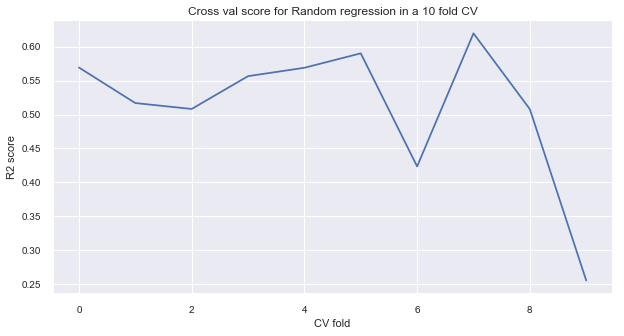

In [83]:
plt.figure(figsize=(10,5))
plt.plot(resultcv1)
plt.xlabel('CV fold')
plt.ylabel('R2 score')
plt.title('Cross val score for Random regression in a 10 fold CV')
plt.savefig("Cross val score for Random regression in a 10 fold CV.png")
plt.show()

In [215]:
# with Grid search 

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
k=KFold(n_splits=5,random_state=20)
params={'n_estimators':[10,20,30,40,50,100],
       'max_depth':[10,20,30,40,50],
       'min_samples_split' :[0.1,0.2,0.3,0.4,0.5]}

grid=GridSearchCV(estimator=rf_reg,
    param_grid =params,
    scoring=None,
    fit_params=None,
    cv=k,
    verbose=0)


In [226]:
grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 100], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [227]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=0.1,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [228]:
grid.best_params_

{'max_depth': 10, 'min_samples_split': 0.1, 'n_estimators': 50}

In [229]:
rf_reg.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [86]:
rf_reg.set_params(max_depth=10, min_samples_split= 0.1, n_estimators= 50)

rf_reg.fit(x_train,y_train)

#training prediction
y_pred=rf_reg.predict(x_train)
print("\nTraining Score for RandomForestRegressor")
print("-------------------------------------")
print("Mean squared Error",mean_squared_error(y_train,y_pred))
print("r2 score",r2_score(y_train,y_pred))

# testing prediction
y_pred=rf_reg.predict(x_test)
print("\nTesting Score for RandomForestRegressor")
print("------------------------------------")
print("Mean squared Error",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))


Training Score for RandomForestRegressor
-------------------------------------
Mean squared Error 66.24577034601303
r2 score 0.5931534763264041

Testing Score for RandomForestRegressor
------------------------------------
Mean squared Error 66.81365141960639
r2 score 0.5673648434368536


### KNN Regressor

In [87]:
knn= KNeighborsRegressor(n_neighbors=5)

knn.fit(x_train,y_train)

#training prediction
y_pred=knn.predict(x_train)
print("\nTraining Score for KNNRegressor")
print("-------------------------------------")
print("Mean squared Error",mean_squared_error(y_train,y_pred))
print("r2 score",r2_score(y_train,y_pred))

# testing prediction
y_pred=knn.predict(x_test)
print("\nTesting Score for KNNRegressor")
print("------------------------------------")
print("Mean squared Error",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))


Training Score for KNNRegressor
-------------------------------------
Mean squared Error 72.76553971609634
r2 score 0.5531124972643857

Testing Score for KNNRegressor
------------------------------------
Mean squared Error 105.77323767901235
r2 score 0.3150917474026599


In [89]:
# with  K fold cross validation
k=KFold(n_splits=10,random_state=20)
#from sklearn.model_selection import cross_val_score
resultcv2=cross_val_score(knn,x_train,y_train,scoring='r2',cv=k)
print(resultcv2)
print("R2-Score: %0.2f (+/- %0.2f)" % (resultcv2.mean(), resultcv2.std() * 2))

[0.34676104 0.37884642 0.23198949 0.35701856 0.34270892 0.42693803
 0.25743084 0.40242247 0.28942443 0.20158631]
R2-Score: 0.32 (+/- 0.14)


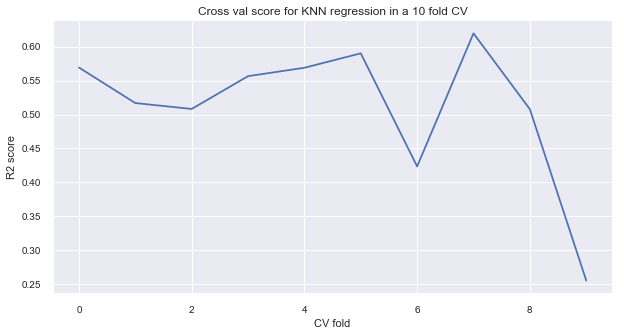

In [90]:
plt.figure(figsize=(10,5))
plt.plot(resultcv1)
plt.xlabel('CV fold')
plt.ylabel('R2 score')
plt.title('Cross val score for KNN regression in a 10 fold CV')
plt.savefig("Cross val score for KNN regression in a 10 fold CV.png")
plt.show()

In [237]:
#with Grid Search

In [88]:
params={'n_neighbors' :[3,5,7,9,11,13,15],
       'metric' : ['hamming','jaccard'],
       'weights': ['uniform','distance']}

kf= KFold(n_splits=3,random_state=3)

grid=GridSearchCV(
    estimator=knn,
    param_grid=params,
    scoring='r2',
    cv=kf)

grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=3, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'metric': ['hamming', 'jaccard'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [244]:
print('Best parameters:',grid.best_params_)
print("Best score",grid.best_score_)
print("Best estimator",grid.best_estimator_)

Best parameters: {'metric': 'hamming', 'n_neighbors': 11, 'weights': 'uniform'}
Best score 0.4485532981163847
Best estimator KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='hamming',
          metric_params=None, n_jobs=None, n_neighbors=11, p=2,
          weights='uniform')


In [247]:
results=grid.cv_results_

In [91]:
knn.set_params(algorithm='auto', leaf_size=30, metric='hamming',
          metric_params=None, n_jobs=None, n_neighbors=11, p=2,
          weights='uniform')

knn.fit(x_train,y_train)

#training prediction
y_pred=knn.predict(x_train)
print("\nTraining Score for KNNRegressor")
print("-------------------------------------")
print("Mean squared Error",mean_squared_error(y_train,y_pred))
print("r2 score",r2_score(y_train,y_pred))

# testing prediction
y_pred=knn.predict(x_test)
print("\nTesting Score for KNNRegressor")
print("------------------------------------")
print("Mean squared Error",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))


Training Score for KNNRegressor
-------------------------------------
Mean squared Error 73.64758948663965
r2 score 0.547695413562615

Testing Score for KNNRegressor
------------------------------------
Mean squared Error 85.75081657601659
r2 score 0.4447419476928036


In [93]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [103]:
ad=AdaBoostRegressor(n_estimators=50)
ad
ad.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [104]:
#training prediction
y_pred=ad.predict(x_train)
print("\nTraining Score for Adaboost Regressor")
print("-------------------------------------")
print("Mean squared Error",mean_squared_error(y_train,y_pred))
print("r2 score",r2_score(y_train,y_pred))

# testing prediction
y_pred=ad.predict(x_test)
print("\nTesting Score for Adaboost Regressor")
print("------------------------------------")
print("Mean squared Error",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred)) 


Training Score for Adaboost Regressor
-------------------------------------
Mean squared Error 187.1411776885742
r2 score -0.14932224625208002

Testing Score for Adaboost Regressor
------------------------------------
Mean squared Error 195.11423484566947
r2 score -0.26341362500933085


In [105]:
gdb=GradientBoostingRegressor(n_estimators=50)
gdb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
#training prediction
y_pred=gdb.predict(x_train)
print("\nTraining Score for Gradientboosting Regressor")
print("-------------------------------------")
print("Mean squared Error",mean_squared_error(y_train,y_pred))
print("r2 score",r2_score(y_train,y_pred))

# testing prediction
y_pred=gdb.predict(x_test)
print("\nTesting Score for Gradientboosting Regressor")
print("------------------------------------")
print("Mean squared Error",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred)) 


Training Score for Gradientboosting Regressor
-------------------------------------
Mean squared Error 64.34390928561086
r2 score 0.6048337022018568

Testing Score for Gradientboosting Regressor
------------------------------------
Mean squared Error 67.133861871471
r2 score 0.5652914004198634


In [107]:
xgb=XGBRegressor(n_estimators=50)
xgb.fit(x_train,y_train)

#training prediction
y_pred=xgb.predict(x_train)
print("\nTraining Score for XGboosting Regressor")
print("-------------------------------------")
print("Mean squared Error",mean_squared_error(y_train,y_pred))
print("r2 score",r2_score(y_train,y_pred))

# testing prediction
y_pred=xgb.predict(x_test)
print("\nTesting Score for XGboosting Regressor")
print("------------------------------------")
print("Mean squared Error",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred)) 

[18:38:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training Score for XGboosting Regressor
-------------------------------------
Mean squared Error 66.45753043603483
r2 score 0.5918529577268289

Testing Score for XGboosting Regressor
------------------------------------
Mean squared Error 66.77907151393237
r2 score 0.5675887570022307


In [108]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [118]:
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
import time

In [129]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6, 0.8, 1.0],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [132]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

#random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(x_train,y_train), 
                                   #verbose=1, random_state=1001 )

grid=GridSearchCV(estimator=xgb,param_grid=params,
                  cv=k,scoring='r2')


In [133]:
#random_search.fit(x_train, y_train)
grid.fit(x_train,y_train)

[19:00:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:01:03] WARNI

[19:04:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:38] WARNI

[19:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:21] WARNI

[19:11:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:11:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:01] WARNI

[19:15:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:49] WARNI

[19:19:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:58] WARNI

[19:23:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:48] WARNI

[19:27:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:12] WARNI

[19:31:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:54] WARNI

[19:35:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:36:14] WARNI

[19:39:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:58] WARNI

[19:43:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:48] WARNI

[19:45:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:46] WARNI

[19:47:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:57] WARNI

[19:50:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:50:26] WARNI

[19:52:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:52:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:52:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:52:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:52:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:52:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:52:28] WARNI

[19:54:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:28] WARNI

[19:55:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:08] WARNI

[19:57:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:57:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:58:06] WARNI

[19:59:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:52] WARNI

[20:01:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:56] WARNI

[20:03:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:03:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:03:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:03:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:03:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:03:45] WARNI

[20:05:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:32] WARNI

[20:07:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:25] WARNI

[20:08:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:09:08] WARNI

[20:10:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:06] WARNI

[20:12:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:12:45] WARNI

[20:14:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:44] WARNI

[20:16:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:23] WARNI

[20:18:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:17] WARNI

[20:19:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:03] WARNI

[20:21:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:48] WARNI

[20:23:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:41] WARNI

[20:25:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:23] WARNI

[20:27:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:27:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:27:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:27:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:27:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:27:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:27:23] WARNI

[20:28:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:29:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:29:02] WARNI

[20:30:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:59] WARNI

[20:32:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:41] WARNI

KeyboardInterrupt: 

In [137]:
#print('Best parameters:',grid.best_params_)
#print("Best score",grid.best_score_)
#print("Best estimator",grid.best_estimator_)

In [136]:
xgb.set_params(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=2)

xgb.fit(x_train,y_train)

#training prediction
y_pred=xgb.predict(x_train)
print("\nTraining Score for XGBRegressor with parameter tuning")
print("-------------------------------------")
print("Mean squared Error",mean_squared_error(y_train,y_pred))
print("r2 score",r2_score(y_train,y_pred))

# testing prediction
y_pred=xgb.predict(x_test)
print("\nTesting Score for XGBRegressor with parameter tuning")
print("------------------------------------")
print("Mean squared Error",mean_squared_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))

[20:40:11] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[20:40:11] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[20:40:11] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[20:40:11] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[20:40:11] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[20:40:11] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[20:40:11]

[20:40:13] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[20:40:13] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[20:40:13] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[20:40:14] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[20:40:14] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[20:40:14] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[20:

In [138]:
xgb=XGBRegressor(n_estimators=50)
xgb.fit(x_train,y_train)

[20:43:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [140]:
# Predicting based on the test data
y_pred_test=xgb.predict(x_test_initial)
y_pred_test_df=pd.DataFrame(y_pred_test)
y_pred_test_df.to_csv('Predicted test time mercedes benz.csv', index=False)